# Transformers, what can they do?

In this section, we will look at what Transformer models can do and use our first tool from the 🤗 Transformers library: the pipeline() function.

👀 See that Open in Colab button on the top right? Click on it to open a Google Colab notebook with all the code samples of this section. This button will be present in any section containing code examples.

If you want to run the examples locally, we recommend taking a look at the setup.

## Transformers are everywhere!

Transformer models are used to solve all kinds of tasks across different modalities, including natural language processing (NLP), computer vision, audio processing, and more. Here are some of the companies and organizations using Hugging Face and Transformer models, who also contribute back to the community by sharing their models:

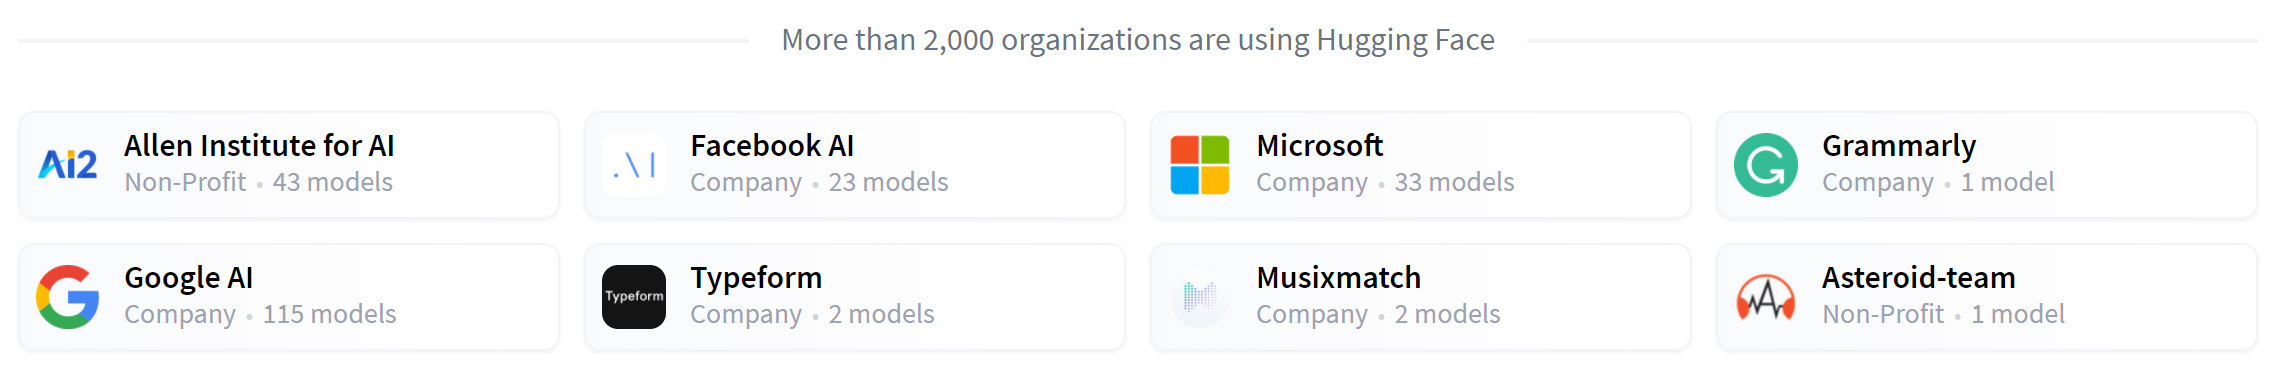

The 🤗 Transformers library provides the functionality to create and use those shared models. The Model Hub contains millions of pretrained models that anyone can download and use. You can also upload your own models to the Hub!

⚠️ The Hugging Face Hub is not limited to Transformer models. Anyone can share any kind of models or datasets they want! Create a huggingface.co account to benefit from all available features!

Before diving into how Transformer models work under the hood, let’s look at a few examples of how they can be used to solve some interesting NLP problems.

## Working with Pipelines


The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

In [2]:
!pip install datasets evaluate "transformers[sentencepiece]"

In [4]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

In [5]:
classifier("There was no explicit instructions on what to install to get this to run")

[{'label': 'NEGATIVE', 'score': 0.9996466636657715}]

We can even pass several sentences!

In [6]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.",
     "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

1) The text is preprocessed into a format the model can understand.
2) The preprocessed inputs are passed to the model.
3) The predictions of the model are post-processed, so you can make sense of them.

## Available pipelines for different modalities
The pipeline() function supports multiple modalities, allowing you to work with text, images, audio, and even multimodal tasks. In this course we’ll focus on text tasks, but it’s useful to understand the transformer architecture’s potential, so we’ll briefly outline it.

Here’s an overview of what’s available:

### Text pipelines
    text-generation: Generate text from a prompt
    text-classification: Classify text into predefined categories
    summarization: Create a shorter version of a text while preserving key information
    translation: Translate text from one language to another
    zero-shot-classification: Classify text without prior training on specific labels
    feature-extraction: Extract vector representations of text

### Image pipelines
    image-to-text: Generate text descriptions of images
    image-classification: Identify objects in an image
    object-detection: Locate and identify objects in images

### Audio Pipelines
    automatic-speech-recognition: Convert speech to text
    audio-classification: Classify audio into categories
    text-to-speech: Convert text to spoken audio

### Multimodal pipelines
    image-text-to-text: Respond to an image based on a text prompt

Let’s explore some of these pipelines in more detail!

## Zero-shot classification

We’ll start by tackling a more challenging task where we need to classify texts that haven’t been labelled. This is a common scenario in real-world projects because annotating text is usually time-consuming and requires domain expertise. For this use case, the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model. You’ve already seen how the model can classify a sentence as positive or negative using those two labels — but it can also classify the text using any other set of labels you like.

In [7]:
#from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445972800254822, 0.11197540163993835, 0.04342729598283768]}

In [8]:
classifier(
    "Hannah does not undertand what is going on",
    candidate_labels=["person", "building", "animal"],
)

{'sequence': 'Hannah does not undertand what is going on',
 'labels': ['person', 'animal', 'building'],
 'scores': [0.9628195762634277, 0.019640929996967316, 0.017539530992507935]}

This pipeline is called zero-shot because you don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!

## Text generation
Now let’s see how to use a pipeline to generate some text. The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it’s normal if you don’t get the same results as shown below.



In [9]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to connect and use the network. We will focus on building a network of users and using the information you collect to create your own content on the web. While this will be a very simple course, you will need to know what you want to learn.\n\nThe course will cover topics including:\n\nThe following topics will be covered in subsequent sections:\n\nThe following topics are covered in the following sections:\n\nHow to build a virtual machine for the cloud\n\nHow to build a full virtual machine for the cloud\n\nHow to build a complete virtual machine for the cloud\n\nHow to build a complete virtual machine for the cloud\n\nNetworking\n\nThe following topics are covered in the following sections:\n\nHow to connect and connect with the internet\n\nHow to connect and connect with the internet\n\nHow to connect and connect with the internet\n\nHow to connect and connect with the internet\n\nHow to connect and connect with the interne

You can control how many different sequences are generated with the argument num_return_sequences and the total length of the output text with the argument max_length.

## Using any model from the Hub in a pipeline

The previous examples used the default model for the task at hand, but you can also choose a particular model from the Hub to use in a pipeline for a specific task — say, text generation. Go to the Model Hub and click on the corresponding tag on the left to display only the supported models for that task. You should get to a page like this one.

Let’s try the HuggingFaceTB/SmolLM2-360M model! Here’s how to load it in the same pipeline as before:

In [16]:
generator = pipeline("text-generation", model="HuggingFaceTB/SmolLM2-360M")
generator(
    "In this course, we will teach you how to",
    truncation=True,
    max_new_tokens=20,
    num_return_sequences=2,
)

Device set to use mps:0
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to use a variety of tools and techniques to create beautiful, eye-catching compositions. We will start by'},
 {'generated_text': 'In this course, we will teach you how to solve these problems. You will then be able to apply your knowledge to similar problems in your daily life'}]

You can refine your search for a model by clicking on the language tags, and pick a model that will generate text in another language. The Model Hub even contains checkpoints for multilingual models that support several languages.

Once you select a model by clicking on it, you’ll see that there is a widget enabling you to try it directly online. This way you can quickly test the model’s capabilities before downloading it.

## Inference Providers
All the models can be tested directly through your browser using the Inference Providers, which is available on the Hugging Face website. You can play with the model directly on this page by inputting custom text and watching the model process the input data.

Inference Providers that powers the widget is also available as a paid product, which comes in handy if you need it for your workflows. See the pricing page for more details.

## Mask filling
The next pipeline you’ll try is fill-mask. The idea of this task is to fill in the blanks in a given text:

In [17]:
unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


[{'score': 0.19620022177696228,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.040527570992708206,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

The top_k argument controls how many possibilities you want to be displayed. Note that here the model fills in the special <mask> word, which is often referred to as a mask token. Other mask-filling models might have different mask tokens, so it’s always good to verify the proper mask word when exploring other models. One way to check it is by looking at the mask word used in the widget.

In [18]:
unmasker("This course will teach you all about <mask> <mask>.", top_k=2)

[[{'score': 0.00614392152056098,
   'token': 17997,
   'token_str': ' quantum',
   'sequence': '<s>This course will teach you all about quantum<mask>.</s>'},
  {'score': 0.004993170499801636,
   'token': 37218,
   'token_str': ' multit',
   'sequence': '<s>This course will teach you all about multit<mask>.</s>'}],
 [{'score': 0.019942399114370346,
   'token': 8326,
   'token_str': ' programming',
   'sequence': '<s>This course will teach you all about<mask> programming.</s>'},
  {'score': 0.009790231473743916,
   'token': 16797,
   'token_str': ' psychology',
   'sequence': '<s>This course will teach you all about<mask> psychology.</s>'}]]

### Named entity recognition

Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations. Let’s look at an example:

In [19]:
ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
/opt/ana

[{'entity_group': 'PER',
  'score': np.float32(0.9981694),
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': np.float32(0.9796019),
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': np.float32(0.9932106),
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

Here the model correctly identified that Sylvain is a person (PER), Hugging Face an organization (ORG), and Brooklyn a location (LOC).

We pass the option grouped_entities=True in the pipeline creation function to tell the pipeline to regroup together the parts of the sentence that correspond to the same entity: here the model correctly grouped “Hugging” and “Face” as a single organization, even though the name consists of multiple words. In fact, as we will see in the next chapter, the preprocessing even splits some words into smaller parts. For instance, Sylvain is split into four pieces: S, ##yl, ##va, and ##in. In the post-processing step, the pipeline successfully regrouped those pieces.

## Question answering

The question-answering pipeline answers questions using information from a given context:

In [20]:
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


{'score': 0.6949760913848877, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

Note that this pipeline works by extracting information from the provided context; it does not generate the answer.

## Summarization
Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text. Here’s an example:

In [21]:
summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

Like with text generation, you can specify a max_length or a min_length for the result.

## Translation
For translation, you can use a default model if you provide a language pair in the task name (such as "translation_en_to_fr"), but the easiest way is to pick the model you want to use on the Model Hub. Here we’ll try translating from French to English:

In [22]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

/opt/anaconda3/envs/torch/lib/python3.12/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use mps:0


[{'translation_text': 'This course is produced by Hugging Face.'}]

Like with text generation and summarization, you can specify a max_length or a min_length for the result.

## Image and audio pipelines
Beyond text, Transformer models can also work with images and audio. Here are a few examples:

### Image Classification

In [23]:
image_classifier = pipeline(
    task="image-classification", model="google/vit-base-patch16-224"
)
result = image_classifier(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
print(result)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use mps:0


[{'label': 'lynx, catamount', 'score': 0.433500200510025}, {'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 'score': 0.03479619696736336}, {'label': 'snow leopard, ounce, Panthera uncia', 'score': 0.03240187466144562}, {'label': 'Egyptian cat', 'score': 0.023944778367877007}, {'label': 'tiger cat', 'score': 0.022889159619808197}]


### Automatic Speach Recognition

In [26]:
# if error triggers, run "conda install ffmpeg" in terminal

In [25]:
transcriber = pipeline(
    task="automatic-speech-recognition", model="openai/whisper-large-v3"
)
result = transcriber(
    "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac"
)
print(result)

Device set to use mps:0
`return_token_timestamps` is deprecated for WhisperFeatureExtractor and will be removed in Transformers v5. Use `return_attention_mask` instead, as the number of frames can be inferred from it.
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}


## Combining data from multiple sources

One powerful application of Transformer models is their ability to combine and process data from multiple sources. This is especially useful when you need to:

    Search across multiple databases or repositories
    Consolidate information from different formats (text, images, audio)
    Create a unified view of related information
For example, you could build a system that:

    Searches for information across databases in multiple modalities like text and image.
    Combines results from different sources into a single coherent response. For example, from an audio file and text description.
    Presents the most relevant information from a database of documents and metadata.
### Conclusion
The pipelines shown in this chapter are mostly for demonstrative purposes. They were programmed for specific tasks and cannot perform variations of them. In the next chapter, you’ll learn what’s inside a pipeline() function and how to customize its behavior.

